In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2



Посмотрите формат таблиц

In [156]:
df.dtypes

,0
Дата,object
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Сразу переведем столбец "Дата" в правильный формат

In [157]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df['Дата'])

0        2018-01-04
1        2018-01-04
2        2018-01-04
3        2018-01-04
4        2018-01-04
            ...    
301350   2018-08-31
301351   2018-08-31
301352   2018-08-31
301353   2018-08-31
301354   2018-08-31
Name: Дата, Length: 301355, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

*   List item
*   List item



---



In [158]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')
print(grouped_df)

          Дата  Количество продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [159]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

<Figure size 1200x600 with 0 Axes>

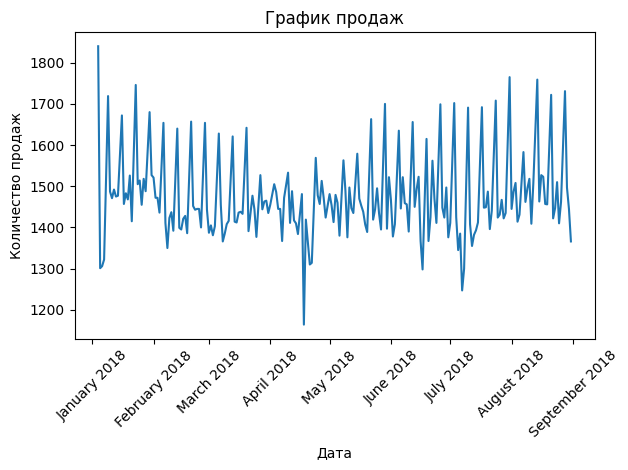

In [160]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

fig, ax = plt.subplots()
ax.plot(grouped_df['Дата'], grouped_df['Количество продаж'])

ax.set_xlabel('Дата')
ax.set_ylabel('Количество продаж')
ax.set_title('График продаж')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%B %Y'))

plt.xticks(rotation=45)
plt.tight_layout()

#print(grouped_df['Дата'][:5], grouped_df['Дата'][-5:])
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике отображються количество продаж за каждый месяц 2018 года.
Похоже, что в течение года нет четкой тенденции к росту или падению. Значения колеблются вокруг определенного уровня.
Данные довольно волатильны, с частыми пиками и впадинами. Диапазон значений значительный - от +- 1100 до 1900.
В январе 2018 года наблюдается заметный всплеск значений.
Происходит резкое падение в середине апреля.
В последующие месяцы года значения колеблятся не так сильно.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [161]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Количество'] < Q1 - 1.5 * IQR) | (df['Количество'] > Q3 + 1.5 * IQR)]
max_outlier_row = outliers[outliers['Количество'] == outliers['Количество'].max()]

max_outlier_row


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [162]:
products_by_rule = df[
    ((df['Дата'].dt.month == 6) |
    (df['Дата'].dt.month == 7) |
    (df['Дата'].dt.month == 8)) &
    (df['Дата'].dt.dayofweek == 2) &
    (df['Склад'] == 3)
 ]
products_by_rule.groupby('Номенклатура')['Количество'].sum().idxmax()

'product_1'

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [163]:
df_weather = pd.read_excel('weather.xls', skiprows=6)
df_weather.head()
df_weather['Местное время в Астане'] = pd.to_datetime(df_weather['Местное время в Астане'], format='%d.%m.%Y %H:%M')
df_weather['Дата'] = df_weather['Местное время в Астане'].dt.date
df_weather = df_weather.drop(columns=['Местное время в Астане'])
df_weather.head()

grouped_df_weather = df_weather.groupby('Дата')['T'].mean().reset_index()
grouped_df_weather['Дата'] = pd.to_datetime(grouped_df_weather['Дата'], format='%Y-%m-%d')
grouped_df_weather['T'] = pd.to_numeric(grouped_df_weather['T'])

grouped_df_weather.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [164]:
grouped_df_weather.dtypes

,0
Дата,datetime64[ns]
T,float64


In [167]:
df_merged = pd.merge(grouped_df, grouped_df_weather, on='Дата', how='inner')
df_merged.head()

,Дата,Количество продаж,T
0,2018-01-04,1840,-14.0750
1,2018-01-05,1301,-16.8625
2,2018-01-06,1306,-13.3000
3,2018-01-07,1322,-12.7500
4,2018-01-09,1719,-6.2500


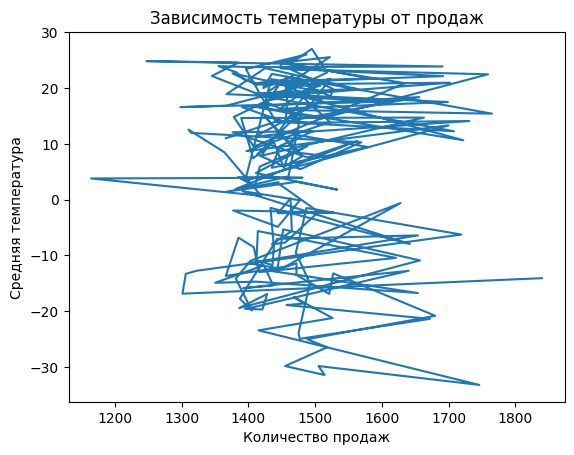

In [171]:
fig, ax = plt.subplots()

ax.plot(df_merged['Количество продаж'], df_merged['T'])

ax.set_xlabel('Количество продаж')
ax.set_ylabel('Средняя температура')
ax.set_title('Зависимость температуры от продаж')

plt.show()

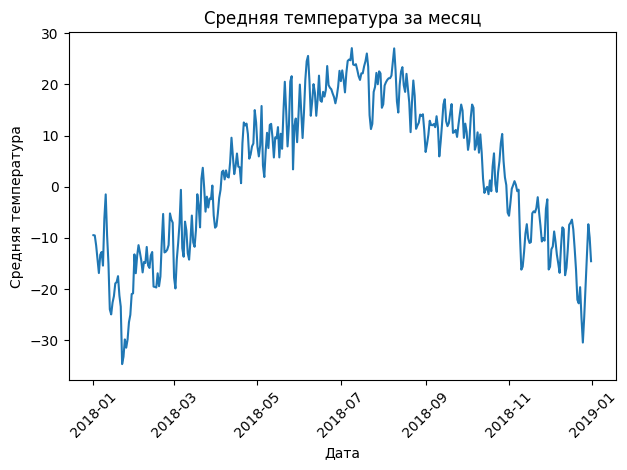

In [166]:
fig, ax = plt.subplots()
ax.plot(grouped_df_weather['Дата'], grouped_df_weather['T'])

ax.set_xlabel('Дата')
ax.set_ylabel('Средняя температура')
ax.set_title('Средняя температура за месяц')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

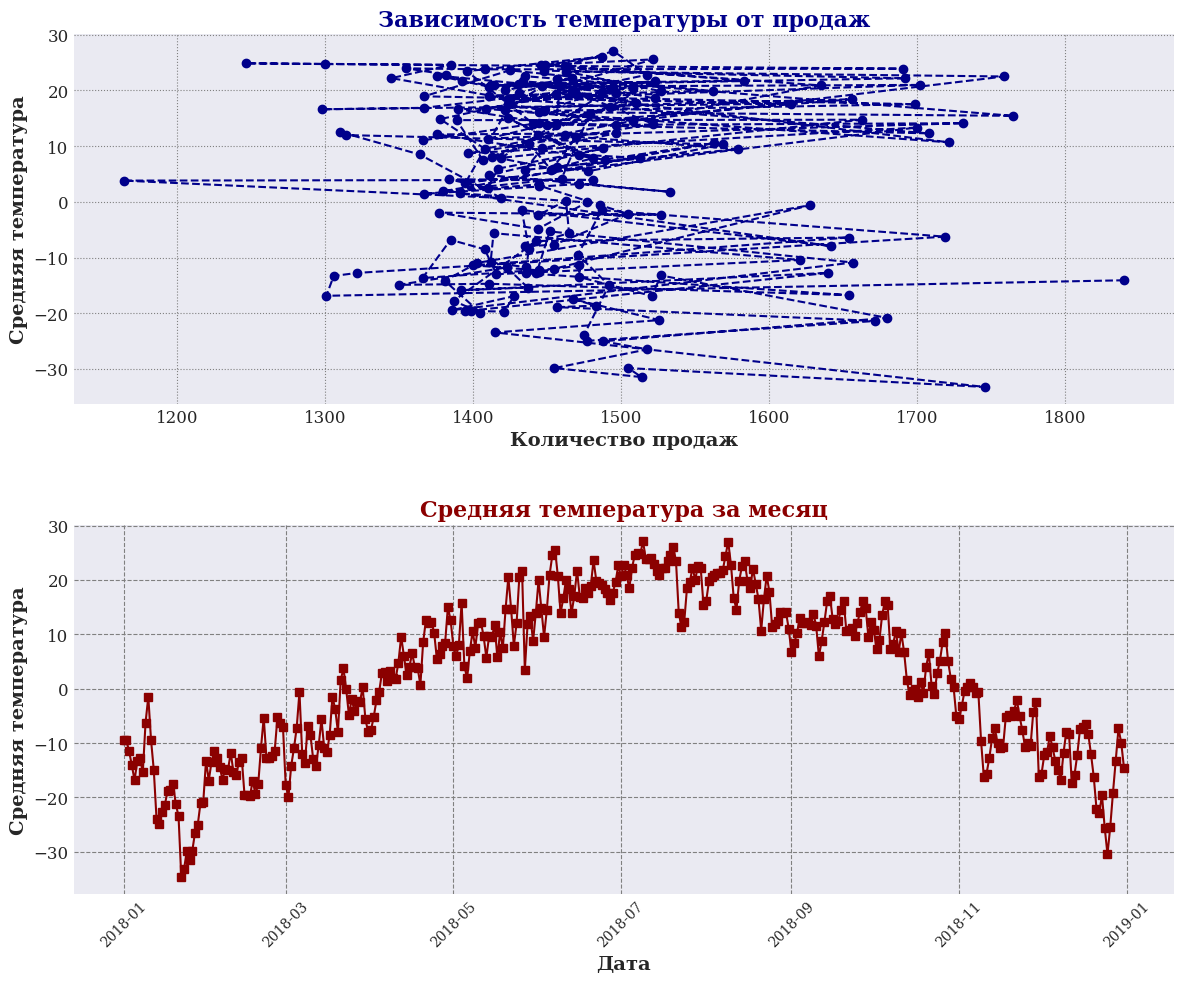

In [177]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 10))

ax1.plot(df_merged['Количество продаж'], df_merged['T'], color='darkblue', linestyle='--', marker='o')
ax1.set_xlabel('Количество продаж', fontsize=14, fontweight='bold')
ax1.set_ylabel('Средняя температура', fontsize=14, fontweight='bold')
ax1.set_title('Зависимость температуры от продаж', fontsize=16, fontweight='bold', color='darkblue')
ax1.grid(True, linestyle=':', color='gray')

ax2.plot(grouped_df_weather['Дата'], grouped_df_weather['T'], color='darkred', linestyle='-', marker='s')
ax2.set_xlabel('Дата', fontsize=14, fontweight='bold')
ax2.set_ylabel('Средняя температура', fontsize=14, fontweight='bold')
ax2.set_title('Средняя температура за месяц', fontsize=16, fontweight='bold', color='darkred')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(True, linestyle='--', color='gray')

plt.tight_layout(h_pad=3)

plt.show()